In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#Reading Dataset
df=pd.read_csv('globalterrorismdb_0718dist.csv',low_memory=False,encoding="ISO-8859–1")

In [3]:
# Reading first 5 values from Dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# Reading last 5 values from Dataset
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
#Dimension of the dataset 
df.shape

(181691, 135)

In [6]:
# All Columns present in Dataset
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# Renaming the Columns for better understanding
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'}, inplace=True)

In [8]:
# Deleting the unnecessary items
df=df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [9]:
# summary of the data
df.describe()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,0.045346,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,0.208063,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [10]:
# Updated first 5 values from Dataset
df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


([<matplotlib.axis.XTick at 0x2e34ab28940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

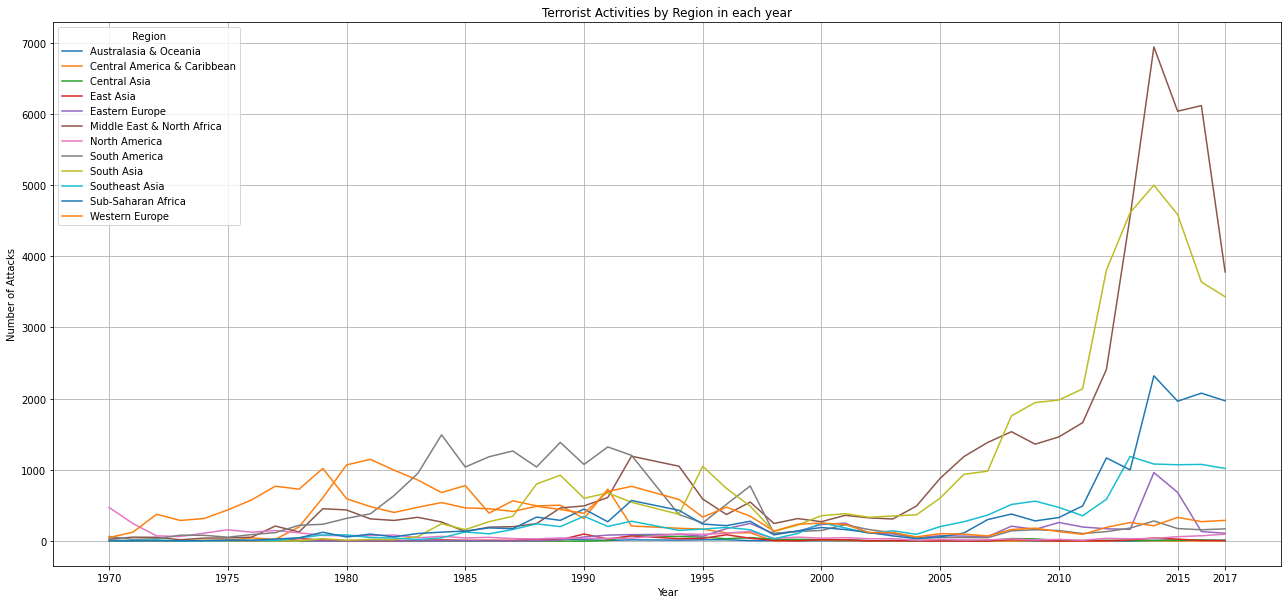

In [11]:
# Terrorist Activities by Region in each year
pd.crosstab(df.Year, df.Region).plot(kind='line',figsize=(22,10))
plt.title('Terrorist Activities by Region in each year')
plt.ylabel('Number of Attacks')
plt.grid()
plt.xticks([1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2017])

In [12]:
# Most Affected Region
df['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Middle East & North Africa'),
  Text(1, 0, 'South Asia'),
  Text(2, 0, 'South America'),
  Text(3, 0, 'Sub-Saharan Africa'),
  Text(4, 0, 'Western Europe'),
  Text(5, 0, 'Southeast Asia'),
  Text(6, 0, 'Central America & Caribbean'),
  Text(7, 0, 'Eastern Europe'),
  Text(8, 0, 'North America'),
  Text(9, 0, 'East Asia'),
  Text(10, 0, 'Central Asia'),
  Text(11, 0, 'Australasia & Oceania')])

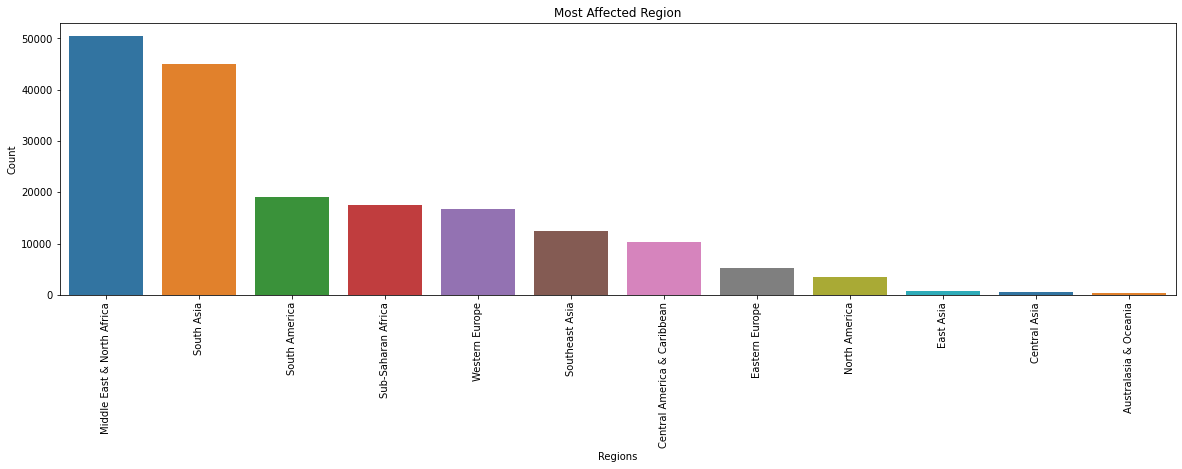

In [13]:
# Plotting the barplot
plt.figure(figsize = (20,5))
sns.barplot(df['Region'].value_counts()[:15].index,df['Region'].value_counts()[:15].values,palette='tab10')
plt.title('Most Affected Region')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation = 90)

In [14]:
#Conclusion: 1) Most Affected Region->Middle East & North Africa
#2)Least Affected Region->Australasia & Oceania
#Top 10 Affected Countries
df['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Iraq'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'Afghanistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Colombia'),
  Text(5, 0, 'Philippines'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'El Salvador'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'Turkey')])

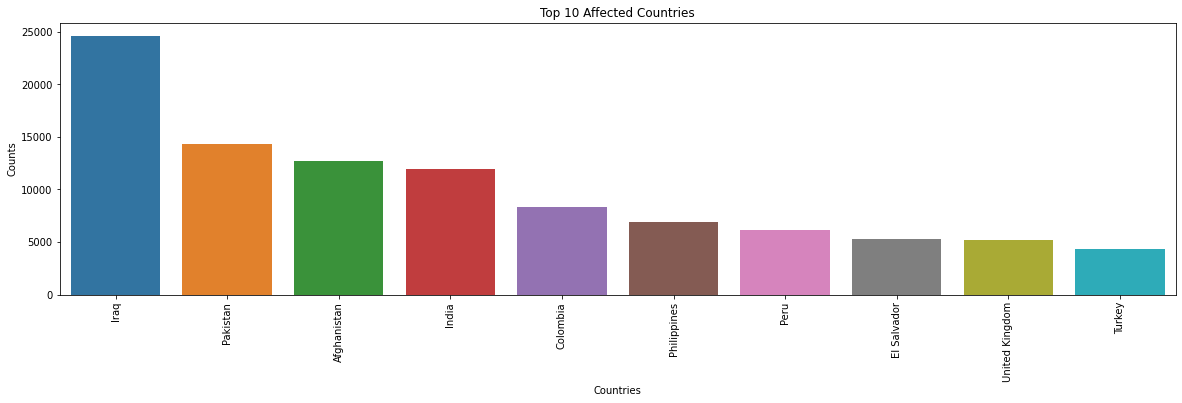

In [15]:
plt.figure(figsize = (20,5))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values)
plt.title('Top 10 Affected Countries')
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

In [16]:
#Conclusion:
#1) Most Affected Country->Iraq
#2) Among Top 10 Affected Countries, 5 are Asian
# Top 10 States with most Terrorist Attacks
# Overall States
df['State'].value_counts().head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Baghdad'),
  Text(1, 0, 'Northern Ireland'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Balochistan'),
  Text(4, 0, 'Saladin'),
  Text(5, 0, 'Al Anbar'),
  Text(6, 0, 'Nineveh'),
  Text(7, 0, 'Sindh'),
  Text(8, 0, 'Khyber Pakhtunkhwa'),
  Text(9, 0, 'Diyala')])

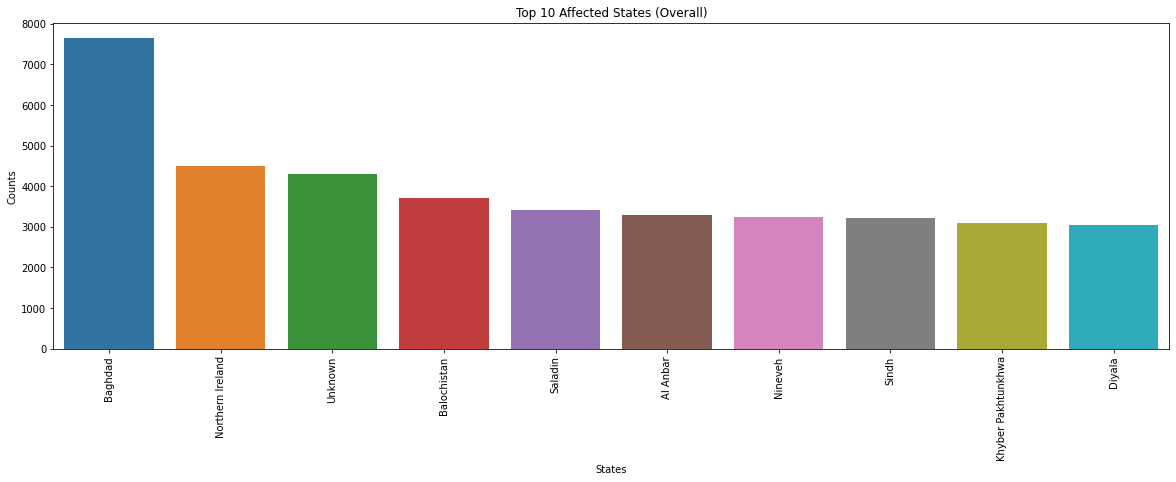

In [17]:
plt.figure(figsize = (20,6))
sns.barplot(df['State'].value_counts()[:10].index,df['State'].value_counts()[:10].values)
plt.title('Top 10 Affected States (Overall)')
plt.xlabel('States')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

In [18]:
#Conclusion:
#1) Most Affected state->Baghdad
# States of America
df_astates=df[df['Country']=='United States']['State']
df_astates.value_counts()[:10]

California              595
New York                515
Puerto Rico             248
Florida                 158
Illinois                112
Washington              101
District of Columbia     83
Oregon                   67
Texas                    63
Massachusetts            57
Name: State, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Puerto Rico'),
  Text(3, 0, 'Florida'),
  Text(4, 0, 'Illinois'),
  Text(5, 0, 'Washington'),
  Text(6, 0, 'District of Columbia'),
  Text(7, 0, 'Oregon'),
  Text(8, 0, 'Texas'),
  Text(9, 0, 'Massachusetts')])

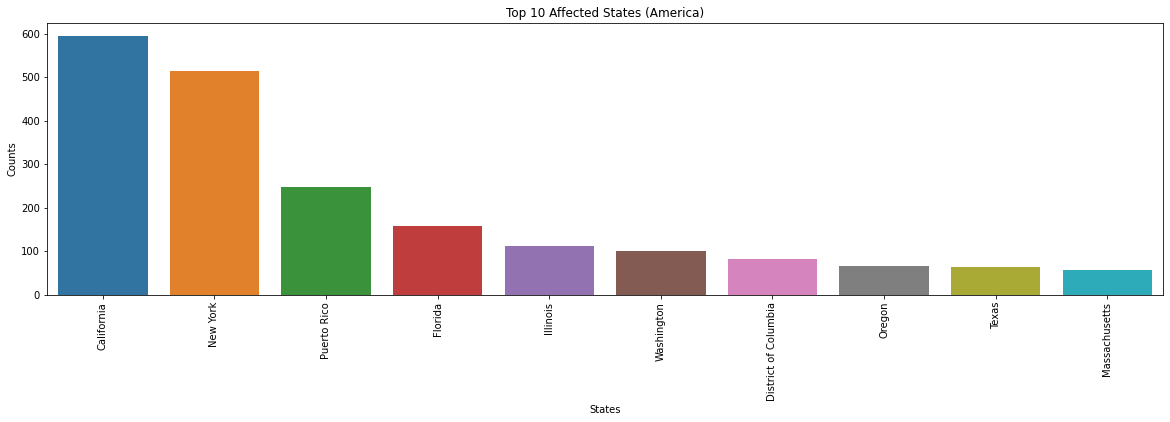

In [19]:
plt.figure(figsize = (20,5))
sns.barplot(df_astates.value_counts()[:10].index,df_astates.value_counts()[:10].values)
plt.title('Top 10 Affected States (America)')
plt.xlabel('States')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

In [20]:
#Conclusion:
#1) Most Affected state in America->California
# States of India
df_istates=df[df['Country']=='India']['State']
df_istates.value_counts()[:10]

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Name: State, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Jammu and Kashmir'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Manipur'),
  Text(3, 0, 'Chhattisgarh'),
  Text(4, 0, 'Punjab'),
  Text(5, 0, 'Jharkhand'),
  Text(6, 0, 'Bihar'),
  Text(7, 0, 'West Bengal'),
  Text(8, 0, 'Odisha'),
  Text(9, 0, 'Maharashtra')])

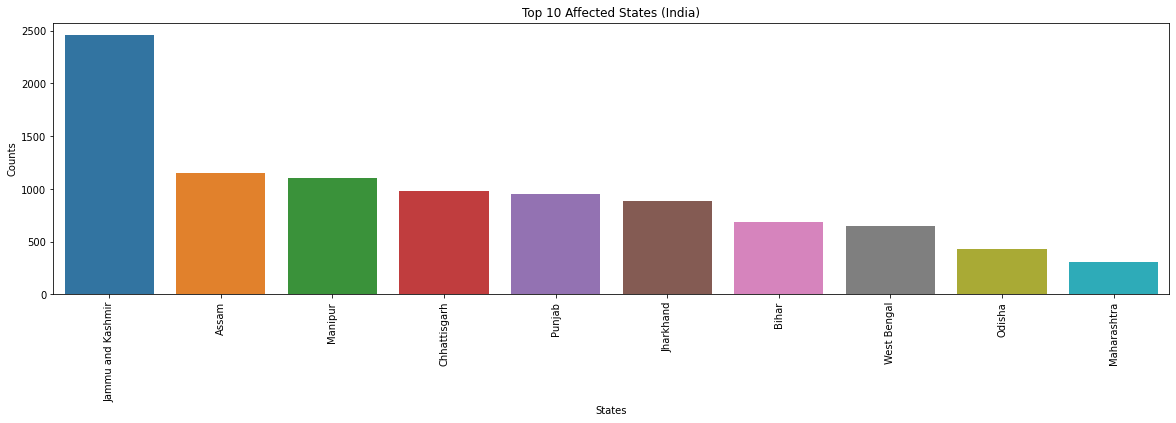

In [21]:
plt.figure(figsize = (20,5))
sns.barplot(df_istates.value_counts()[:10].index,df_istates.value_counts()[:10].values)
plt.title('Top 10 Affected States (India)')
plt.xlabel('States')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

In [22]:
#Conclusion:
#1)Most Affected state in India->J&K
# Top 10 Cities with Most Terrorist Attacks
# Overall Cities
df['City'].value_counts()[:10]

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Baghdad'),
  Text(2, 0, 'Karachi'),
  Text(3, 0, 'Lima'),
  Text(4, 0, 'Mosul'),
  Text(5, 0, 'Belfast'),
  Text(6, 0, 'Santiago'),
  Text(7, 0, 'Mogadishu'),
  Text(8, 0, 'San Salvador'),
  Text(9, 0, 'Istanbul')])

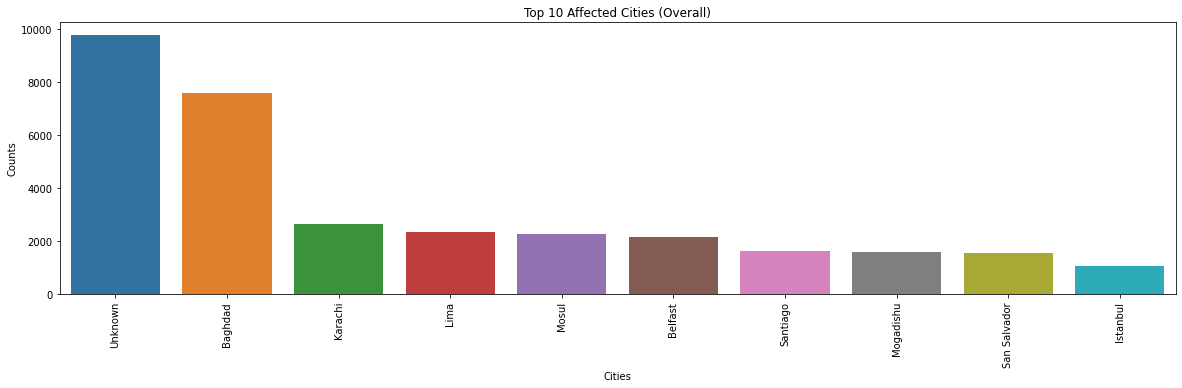

In [23]:
plt.figure(figsize = (20,5))
sns.barplot(df['City'].value_counts()[:10].index,df['City'].value_counts()[:10].values)
plt.title('Top 10 Affected Cities (Overall)')
plt.xlabel('Cities')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

In [24]:
# Top 10 Cities in America with most Terrorist Attacks
df_acities=df[df['Country']=='United States']['City']
df_acities.value_counts()[:10]

New York City    460
San Juan         116
Los Angeles      109
San Francisco     98
Washington        85
Miami             85
Chicago           57
Seattle           39
Berkeley          33
Denver            23
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'New York City'),
  Text(1, 0, 'San Juan'),
  Text(2, 0, 'Los Angeles'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Miami'),
  Text(6, 0, 'Chicago'),
  Text(7, 0, 'Seattle'),
  Text(8, 0, 'Berkeley'),
  Text(9, 0, 'Denver')])

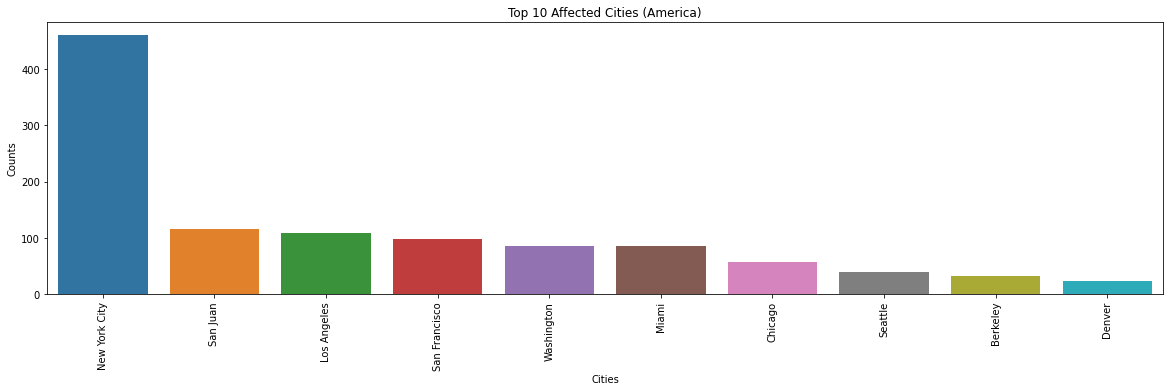

In [25]:
plt.figure(figsize = (20,5))
sns.barplot(df_acities.value_counts()[:10].index,df_acities.value_counts()[:10].values)
plt.title('Top 10 Affected Cities (America)')
plt.xlabel('Cities')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

In [26]:
#Conclusion:
#1) Most Affected city in America->New York
# Top 10 Cities in India with most Terrorist Attacks
df_icities=df[df['Country']=='India']['City']
df_icities.value_counts()[:10]

Srinagar     658
Unknown      624
Imphal       426
New Delhi    157
Amritsar     138
Sopore       102
Ludhiana      77
Guwahati      77
Anantnag      76
Jammu         57
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Srinagar'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Imphal'),
  Text(3, 0, 'New Delhi'),
  Text(4, 0, 'Amritsar'),
  Text(5, 0, 'Sopore'),
  Text(6, 0, 'Ludhiana'),
  Text(7, 0, 'Guwahati'),
  Text(8, 0, 'Anantnag'),
  Text(9, 0, 'Jammu')])

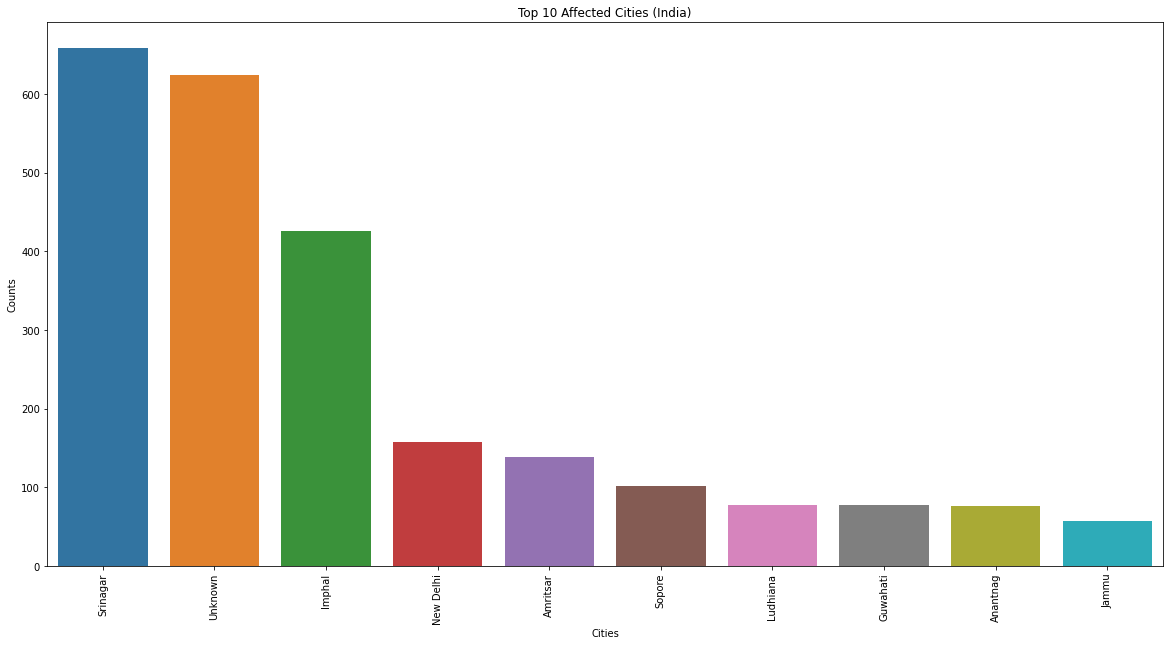

In [27]:
plt.figure(figsize = (20,10))
sns.barplot(df_icities.value_counts()[:10].index,df_icities.value_counts()[:10].values)
plt.title('Top 10 Affected Cities (India)')
plt.xlabel('Cities')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

In [28]:
#Conclusion:
#1)Most Affected city in India->Srinagar
# Number of Terrorist Activities each Year
df['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

Text(0, 0.5, 'Counts')

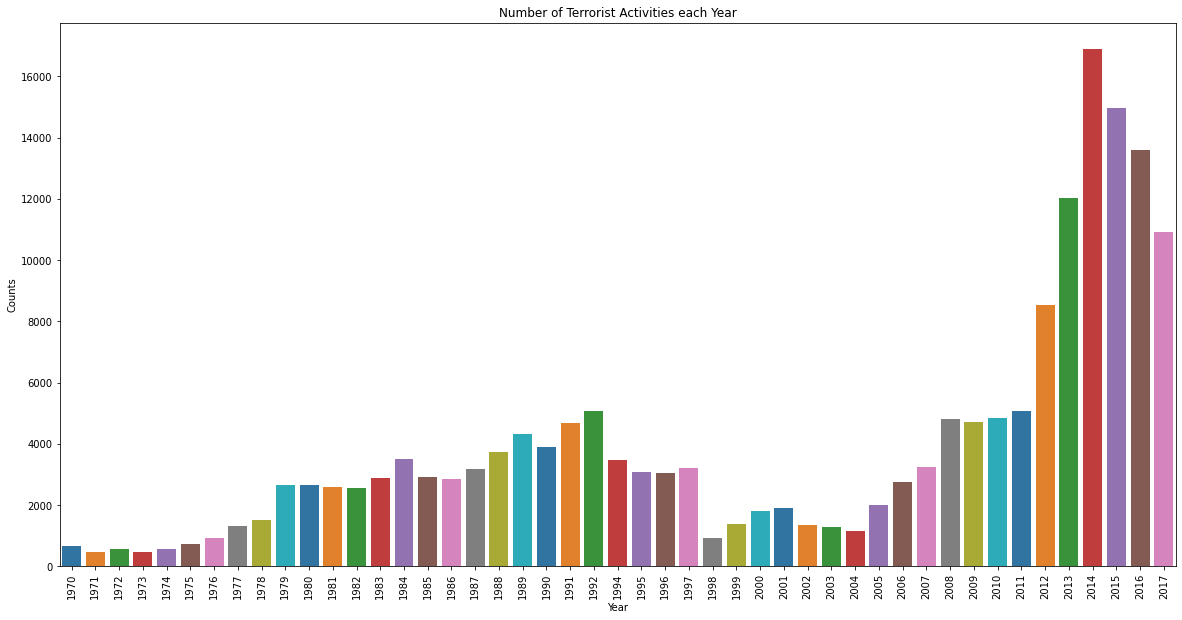

In [29]:
plt.figure(figsize = (20,10))
sns.countplot('Year',data=df,palette='tab10')
plt.xticks(rotation = 90)
plt.title('Number of Terrorist Activities each Year')
plt.xlabel('Year')
plt.ylabel('Counts')

In [30]:
#Conclusion:
#Highest number of attacks in 2014
#Lowest number of attacks in 1971
# Methods of Attack
df['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Bombing/Explosion'),
  Text(1, 0, 'Armed Assault'),
  Text(2, 0, 'Assassination'),
  Text(3, 0, 'Hostage Taking (Kidnapping)'),
  Text(4, 0, 'Facility/Infrastructure Attack'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'Unarmed Assault'),
  Text(7, 0, 'Hostage Taking (Barricade Incident)'),
  Text(8, 0, 'Hijacking')])

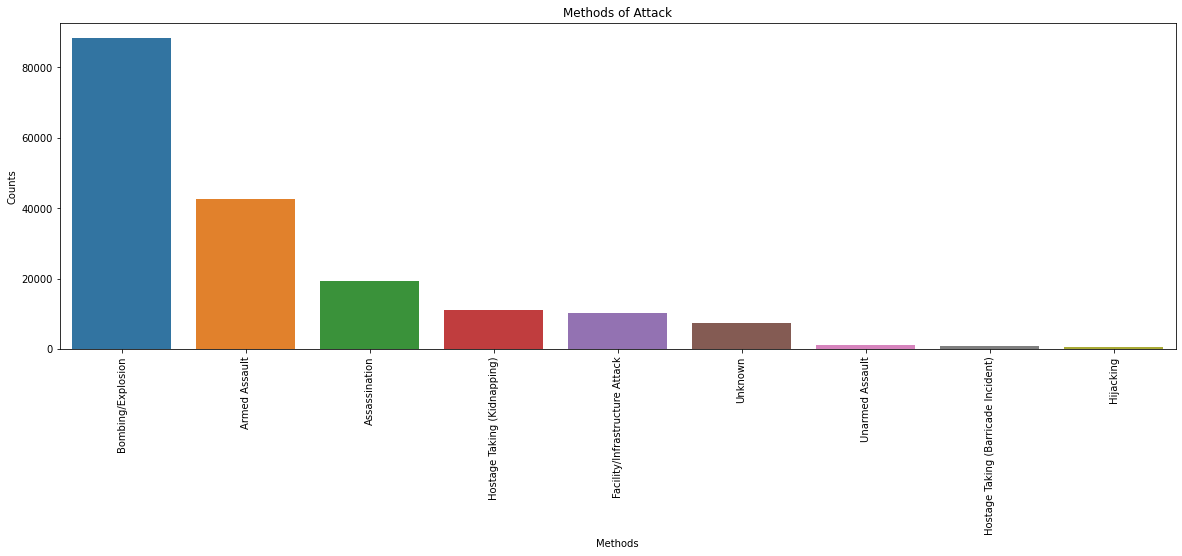

In [31]:
plt.figure(figsize = (20,6))
sns.countplot(df['AttackType'],order = df['AttackType'].value_counts().index,palette='tab10')
plt.title('Methods of Attack')
plt.xlabel('Methods')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

In [32]:
#Conclusion:
#1) Most of the attack types-> Bombing/Explosion
#2) Least of the attack types-> Hijacking
# Type of Targets
df["Target_type"].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Private Citizens & Property'),
  Text(1, 0, 'Military'),
  Text(2, 0, 'Police'),
  Text(3, 0, 'Government (General)'),
  Text(4, 0, 'Business'),
  Text(5, 0, 'Transportation'),
  Text(6, 0, 'Utilities'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Religious Figures/Institutions'),
  Text(9, 0, 'Educational Institution'),
  Text(10, 0, 'Government (Diplomatic)'),
  Text(11, 0, 'Terrorists/Non-State Militia'),
  Text(12, 0, 'Journalists & Media'),
  Text(13, 0, 'Violent Political Party'),
  Text(14, 0, 'Airports & Aircraft'),
  Text(15, 0, 'Telecommunication'),
  Text(16, 0, 'NGO'),
  Text(17, 0, 'Tourists'),
  Text(18, 0, 'Maritime'),
  Text(19, 0, 'Food or Water Supply'),
  Text(20, 0, 'Abortion Related'),
  Text(21, 0, 'Other')])

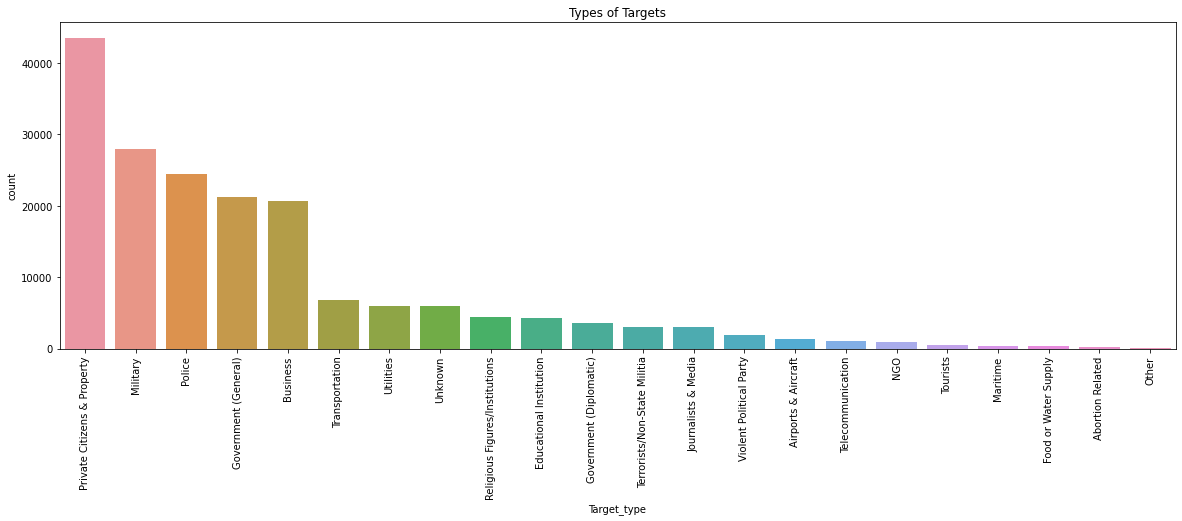

In [33]:
plt.figure(figsize = (20,6))
sns.countplot(x="Target_type", data=df, order=df["Target_type"].value_counts().index)
plt.title('Types of Targets')
plt.xticks(rotation = 90)

In [34]:
#Conclusion:
#1) Most Target type-> Private Citizens & Property
# Most frequent groups invloved in Terrorist activity
df['Group'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

Text(0.5, 1.0, 'Most Active Terrorist Organizations')

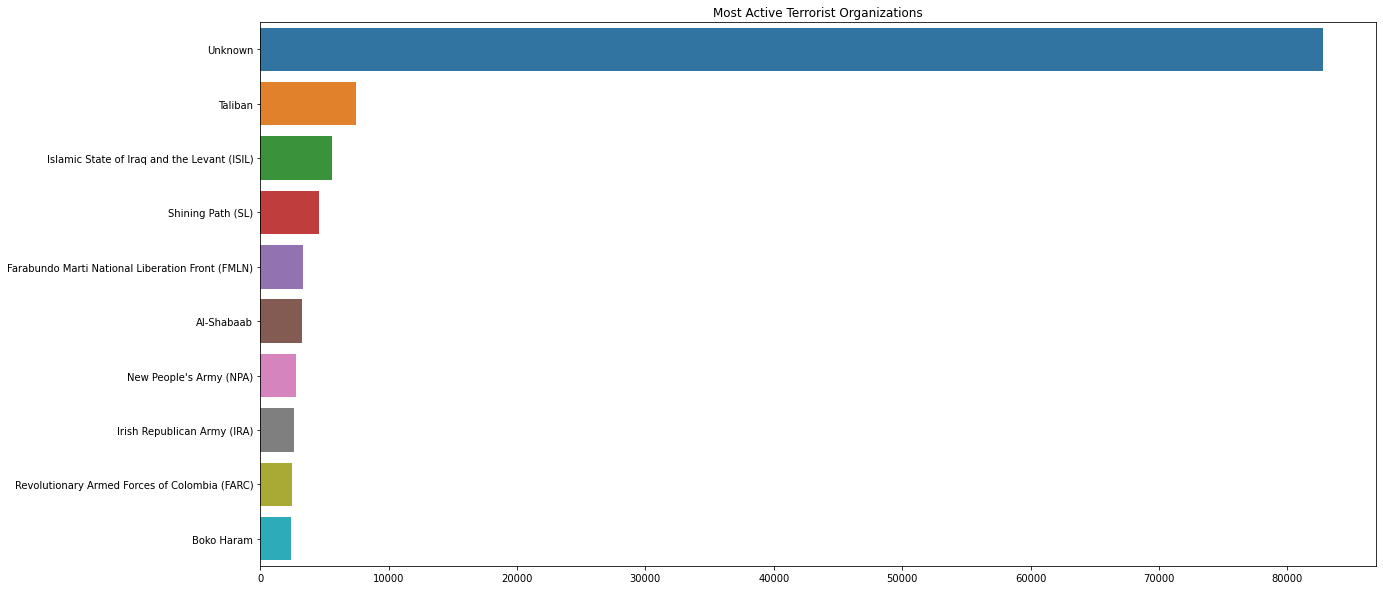

In [35]:
plt.subplots(figsize = (20,10))
sns.barplot(y=df['Group'].value_counts()[:10].index, x=df['Group'].value_counts()[:10].values, palette='tab10')
plt.title('Most Active Terrorist Organizations')

In [36]:
#Conclusion:
#1) Most Active Terrorism Organization-> Taliban